In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [29]:
data = pd.read_csv('C:/Users/JANMEJAY/data/ex2data2.txt', header = None)
#X = data.iloc[:,:-1]
#y = data.iloc[:,2]
data.head()
x = data.values[:,:2]
y = data.values[:,2:]
data.head()

x.shape
y.shape
#data.head()

(118, 1)

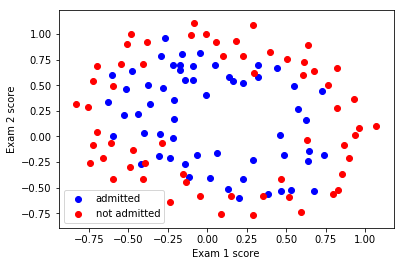

In [4]:
data1=data[data[2]==1]
data2=data[data[2]==0]
data1.shape
plt.scatter(data1[0], data1[1],c='b',label='admitted')
plt.scatter(data2[0],data2[1],c='r',label='not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
#plt.show()
#1>2

In [5]:
1<2



True

In [35]:
def sigmoid(x):
    return 1/1+np.exp(-x)

In [36]:
def costFunction(theta, x, y):
    m,n=x.shape
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(x @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(x @ theta))))
    return J

In [37]:
def gradient(theta, x, y):
    return ((1/m) * x.T @ (sigmoid(x @ theta) - y))
    
    

In [48]:
(m, n) = x.shape
x = data.values[:,:2]
x = np.hstack((np.ones((m,1)), x))
#y = y[:, np.newaxis]
theta = np.ones((n,1)) # intializing theta with all zeros

J = costFunction(theta, x, y)
print(J)


nan


C:\Users\JANMEJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [49]:
#flatten()

temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (x, y.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)

[1. 1. 1.]


C:\Users\JANMEJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [18]:
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

NameError: name 'X' is not defined

C:\Users\JANMEJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\JANMEJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


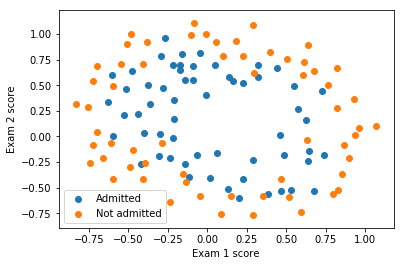

In [11]:
#doubt
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()